<a href="https://colab.research.google.com/github/ronaldbeja/Artificial-intelligence/blob/main/Taller_en_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller en clase

## GRUPO NEURAL NEXUS



*   Andrea Franco Suárez
*   Andrés Felipe Varela Joven
*   Carlos Andrés Urbano Urbano
*   Hardy Galvis Pedraza
*   Ronal Stiven Bejarano Larrahondo



##Dataset: California Housing

El objetivo del dataset es estimar los precios de casas en california en base a ciertas características de las mismas.

In [ ]:
#!pip install scikit-learn  #Instalamos scikit learn en nuestro entorno de python

In [ ]:
#cargamos la informacion con la que trabajaremos 
from sklearn import datasets
import pandas as pd
import numpy as np
house=datasets.fetch_california_housing()
features=house['feature_names']
data=pd.DataFrame(house['data'],columns=features)

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
#esta es la salida
target=pd.DataFrame(house['target'],columns=["target"])
print(target.shape)
target.head()

(20640, 1)


,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


##Regresión lineal Y SVD

Usaremos funciones numpy y matplotlib para calcular la regresión lineal para este problema, y a su vez reducir la dimensión del dataframe de 8 dimensiones a 2 y a 1 para comparar el rendimiento de los modelos cuando se baja la dimensionalidad a través de la Singular Value Decomposition.

Regresion lineal usando matrices

$\hat{\beta}=(X^T.X)^{-1}.X^T.Y$

#Reduccion a 1 variable de entrada

In [ ]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# creamos un objeto que es una svd truncada con dos componentes
Asvd=TruncatedSVD(n_components = 1)

# luego cramos una matriz transformada que equivale ha:
#que equivale a coger el objeto y ajustarlo y transformarlo
Data1Dimen = Asvd.fit_transform(data)

print("----valores singulares en la diagonal de sigma-----")
print(Asvd.singular_values_,"\n")

print("----matriz transformada------3x2")
print(Data1Dimen)
print(Data1Dimen.shape)

----valores singulares en la diagonal de sigma-----
[261944.38470034] 

----matriz transformada------3x2
[[ 328.86110032]
 [2404.51039645]
 [ 502.72270196]
 ...
 [1012.52203262]
 [ 746.93849418]
 [1391.94139699]]
(20640, 1)



##Regresion de 1 dimensiones

In [ ]:
## Calculo para dos dimensiones

X = Data1Dimen
Y = target


# Añadir una columna de unos para el término independiente
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Calcular los coeficientes de la regresión lineal
beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
print(beta_hat)
print("------beta---\n")

# Calcular las predicciones apartir de las mismas entradas de data
y1dim = X.dot(beta_hat)
y1dim.shape
print(X.shape)

[[ 2.10452043e+00]
 [-2.51420922e-05]]
------beta---

(20640, 2)


#regresion con matriz

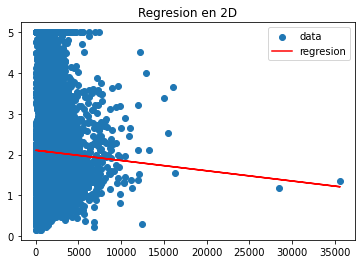

In [ ]:
#graficamos la regresion de 2d

#------------------------------------------
plt.scatter(Data1Dimen,target,label='data')
plt.plot(Data1Dimen,y1dim,color="r",label='regresion')
plt.title('Regresion en 2D')
plt.legend()
plt.show()


#regresion con optimize

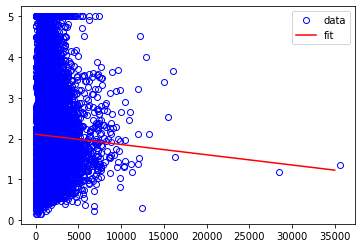

In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

np.random.seed(0)

# Our test function
def f(x, m, b):
    return m*x + b

# Our x and y data
x = np.array(Data1Dimen).reshape(-1,)
y = np.array(target).reshape(-1,)
# Fit the model: the parameters m and b can be found in the `params` vector
params, params_cov = optimize.curve_fit(f, x, y)

# Plot the data and the fitted curve
t = np.linspace(0,35000)

plt.figure(1)
plt.clf()
plt.plot(x, y, 'bo', markerfacecolor='none', label='data')
plt.plot(t, f(t, *params), 'r-', label='fit')
plt.legend()
plt.show()


#funcion con cur fit 
#minimize escaler con la funcion de costo a minimizar
#tratemos de uti

In [ ]:
from scipy.optimize import minimize_scalar

# Definimos la función de costo MSE
def Rmse(p, x, y):
    y_pred = p * x + 2.10452043e+00
    return np.sqrt(np.mean(np.square(y - y_pred))) #calculo 

# Minimizamos la función de costo utilizando minimize_scalar
res = minimize_scalar(Rmse, args=(x, y))

# Obtenemos el valor óptimo del coeficiente de regresión
p_opt = res.x

# Imprimimos el valor óptimo del coeficiente de regresión y el valor mínimo de la función de costo MSE
print('Coeficiente de regresión óptimo:', p_opt)
print('Valor mínimo de la función de costo RMSE:', res.fun)

res

Coeficiente de regresión óptimo: -2.5142099855945697e-05
Valor mínimo de la función de costo RMSE: 1.1535779868615217


 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 1.1535779868615217
       x: -2.5142099855945697e-05
     nit: 15
    nfev: 18

Text(0.5, 1.0, 'Regresión lineal con RMSE')

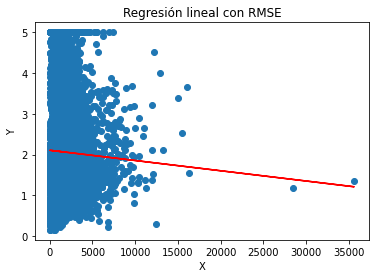

In [ ]:
import matplotlib.pyplot as plt

# Graficamos los datos de entrenamiento
plt.scatter(x, y)

# Calculamos la línea de regresión con el valor óptimo del coeficiente de regresión
x_reg = x
y_reg = p_opt * x_reg + 2.10452043e+00

# Graficamos la línea de regresión
plt.plot(x_reg, y_reg, 'r')

# Agregamos etiquetas al gráfico
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión lineal con RMSE')

# Mostramos el gráfico

Comparacion

<ipython-input-99-1e68946b1a76>:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(t, f(t, *params), 'g-', label='optimize',ls=":",lw=15) #regrecion


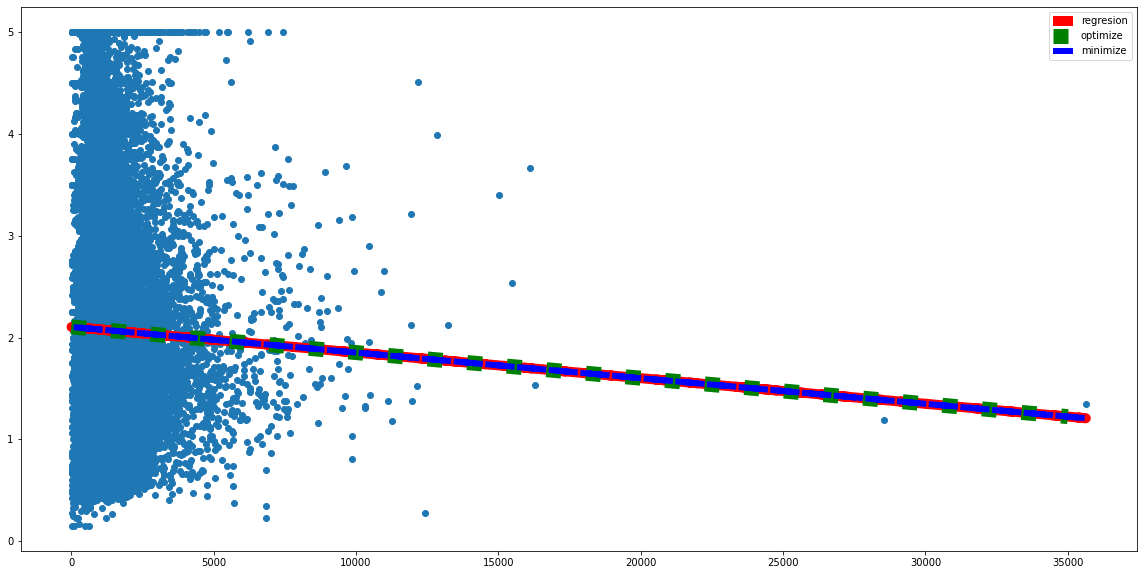

In [ ]:
ax=plt.figure(figsize=[20,10])
plt.plot(Data1Dimen,y1dim,color="r",label='regresion',ls="-.",lw=10) #regresion normal 
plt.plot(t, f(t, *params), 'g-', label='optimize',ls=":",lw=15) #regrecion
plt.plot(x_reg, y_reg, 'b',label='minimize',ls="--",lw=6)# opti
plt.scatter(x, y)
plt.legend()
plt.show()
